In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

--2023-09-24 09:21:42--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.70.207, 74.125.201.207, 74.125.202.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.70.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   267MB/s    in 0.4s    

2023-09-24 09:21:42 (267 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [2]:
import zipfile
zip_ref = zipfile.ZipFile('pizza_steak.zip')
zip_ref.extractall()
zip_ref.close()

In [3]:
import os

for dirpath , dirname , filename in os.walk("pizza_steak"):
  print(f"There are {len(dirname)} Directories and {len(filename)} images in {dirpath} ")

There are 2 Directories and 0 images in pizza_steak 
There are 2 Directories and 0 images in pizza_steak/test 
There are 0 Directories and 250 images in pizza_steak/test/steak 
There are 0 Directories and 250 images in pizza_steak/test/pizza 
There are 2 Directories and 0 images in pizza_steak/train 
There are 0 Directories and 750 images in pizza_steak/train/steak 
There are 0 Directories and 750 images in pizza_steak/train/pizza 


In [4]:
len(dir(os))

387

In [5]:
import matplotlib.image as mpimg
import numpy as np

In [6]:
def sample_extracter ( dir_name , label_name ):
  data= []
  label=[]
  for img in os.listdir(dir_name):
    data.append(mpimg.imread(dir_name+"/"+img))
    label.append(label_name)
  return (np.array(data),np.array(label))


In [7]:
x_train_pizza , y_train_pizza= sample_extracter("pizza_steak/train/pizza",0)
x_test_pizza , y_test_pizza=sample_extracter("pizza_steak/test/pizza",0)
x_train_steak ,y_test_steak=sample_extracter("pizza_steak/train/steak",1)
x_test_steak , y_test_steak=sample_extracter("pizza_steak/test/steak",1)

<ipython-input-6-7cb1b7a5e5b2>:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return (np.array(data),np.array(label))


In [8]:
x_test_pizza.shape , y_test_pizza.shape

((250,), (250,))

In [9]:
import matplotlib.pyplot as plt
import random

In [10]:
def random_img(path , label_class):
  label=['pizza','steak']
  if(label_class==0):
    path=path +"/"+ label[label_class]
  else:
    path=path+"/"+label[label_class]
  random_val= random.choice(os.listdir(path))
  plt.imshow(mpimg.imread(path+"/"+random_val))



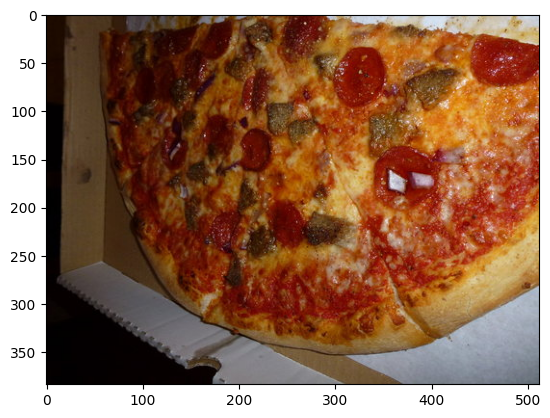

In [11]:
random_img("pizza_steak/train",0)

In [12]:
# normalizing the data


x_train_pizza  = x_train_pizza/255.0

In [13]:
x_test_pizza =x_test_pizza/255.
x_test_steak=x_test_pizza/255.

In [14]:
x_train_steak=x_test_steak/255.

In [15]:
# building a cnn model
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [16]:
tf.random.set_seed(42)

# creating an image generater which normalize and scale the data

train_gen = ImageDataGenerator(rescale=1./255.)
valid_gen = ImageDataGenerator(rescale=1./255.)

# train and validation directories
train_dir = "pizza_steak/train/"
valid_dir = "pizza_steak/test/"

# importing data from directorys
train_data = train_gen.flow_from_directory(directory=train_dir,
                                           batch_size=32,
                                           target_size=(224,224),
                                           class_mode="binary",
                                           seed=42)

valid_data =valid_gen.flow_from_directory(directory=valid_dir,
                                          target_size=(224,224),
                                          batch_size=32,
                                          class_mode="binary",
                                          seed=42)


# making an model

model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10 ,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224,224,3)
                           ),

    tf.keras.layers.Conv2D(10,3,activation="relu"),

    tf.keras.layers.MaxPool2D(pool_size=2 ,
                              padding="valid"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),

    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

#compile model

model_1.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

# fit model

history_1 =model_1.fit(train_data,
                       epochs=5,
                       steps_per_epoch=len(train_data),
                       validation_data=valid_data,
                       validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 26s 189ms/step - loss: 0.5941 - accuracy: 0.6653 - val_loss: 0.4568 - val_accuracy: 0.7860
Epoch 2/5
47/47 [==============================] - 6s 137ms/step - loss: 0.4729 - accuracy: 0.7780 - val_loss: 0.4253 - val_accuracy: 0.8080
Epoch 3/5
47/47 [==============================] - 6s 119ms/step - loss: 0.4322 - accuracy: 0.8053 - val_loss: 0.3691 - val_accuracy: 0.8620
Epoch 4/5
47/47 [==============================] - 7s 140ms/step - loss: 0.3720 - accuracy: 0.8427 - val_loss: 0.3530 - val_accuracy: 0.8520
Epoch 5/5
47/47 [==============================] - 7s 139ms/step - loss: 0.2999 - accuracy: 0.8860 - val_loss: 0.4101 - val_accuracy: 0.8020


In [17]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

In [18]:
# replicating the same model of tensorflow playground

model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=4 ,
                           kernel_size=3,
                           input_shape=(224,224,3),
                           activation="relu"),
    tf.keras.layers.Conv2D(4,3,activation ="relu"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation='sigmoid')
])


model_2.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

history_2 =model_2.fit(train_data,
                       epochs=5,
                       steps_per_epoch=len(train_data),
                       validation_data=valid_data,
                       validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 126ms/step - loss: 0.9159 - accuracy: 0.6440 - val_loss: 0.5609 - val_accuracy: 0.7040
Epoch 2/5
47/47 [==============================] - 6s 129ms/step - loss: 0.5034 - accuracy: 0.7667 - val_loss: 0.4024 - val_accuracy: 0.8180
Epoch 3/5
47/47 [==============================] - 5s 112ms/step - loss: 0.3892 - accuracy: 0.8400 - val_loss: 0.3940 - val_accuracy: 0.8220
Epoch 4/5
47/47 [==============================] - 6s 131ms/step - loss: 0.2999 - accuracy: 0.8920 - val_loss: 0.4108 - val_accuracy: 0.8100
Epoch 5/5
47/47 [==============================] - 6s 121ms/step - loss: 0.1987 - accuracy: 0.9440 - val_loss: 0.3794 - val_accuracy: 0.8240


In [19]:
! nvidia-smi

Sun Sep 24 09:23:53 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P0    26W /  70W |   2927MiB / 15360MiB |      6%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [20]:
# creating model through every step
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_gen_2 =  ImageDataGenerator(1./255.)

test_gen_2= ImageDataGenerator(1./255.)


# generating data using ImageDataGenerator instence

train_data2 =  train_gen_2.flow_from_directory(directory=train_dir ,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode='binary',
                                               seed=42)

test_data2=  test_gen_2.flow_from_directory(directory=valid_dir ,
                                            batch_size=32,
                                            target_size=(224,224),
                                            class_mode='binary',
                                            seed=42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [21]:
images,labels = train_data2.next()

/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1861: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


In [22]:
model_3 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           input_shape=(224,224,3),
                           kernel_size=3,
                           activation='relu'),
    tf.keras.layers.Conv2D(10,3, activation='relu'),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [23]:
model_3.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

In [24]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_7 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_8 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_2 (Flatten)         (None, 475240)            0         
                                                                 
 dense_2 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477341 (1.82 MB)
Trainable params: 477341 (1.82 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
history_3 = model_3.fit(train_data2 , epochs=5 , steps_per_epoch=len(train_data2), validation_data=test_data2, validation_steps=len(test_data2))

Epoch 1/5
47/47 [==============================] - 8s 123ms/step - loss: 94.6881 - accuracy: 0.5840 - val_loss: 0.6967 - val_accuracy: 0.6380
Epoch 2/5
47/47 [==============================] - 5s 115ms/step - loss: 0.5541 - accuracy: 0.7847 - val_loss: 0.7100 - val_accuracy: 0.6380
Epoch 3/5
47/47 [==============================] - 5s 113ms/step - loss: 0.4125 - accuracy: 0.8693 - val_loss: 0.7489 - val_accuracy: 0.6260
Epoch 4/5
47/47 [==============================] - 5s 111ms/step - loss: 0.3036 - accuracy: 0.9147 - val_loss: 0.8237 - val_accuracy: 0.6360
Epoch 5/5
47/47 [==============================] - 5s 110ms/step - loss: 0.2114 - accuracy: 0.9613 - val_loss: 0.9197 - val_accuracy: 0.6520


In [26]:
model_1.evaluate(test_data2)

16/16 [==============================] - 1s 83ms/step - loss: 52.3069 - accuracy: 0.8040


[52.306922912597656, 0.8040000200271606]

<Axes: >

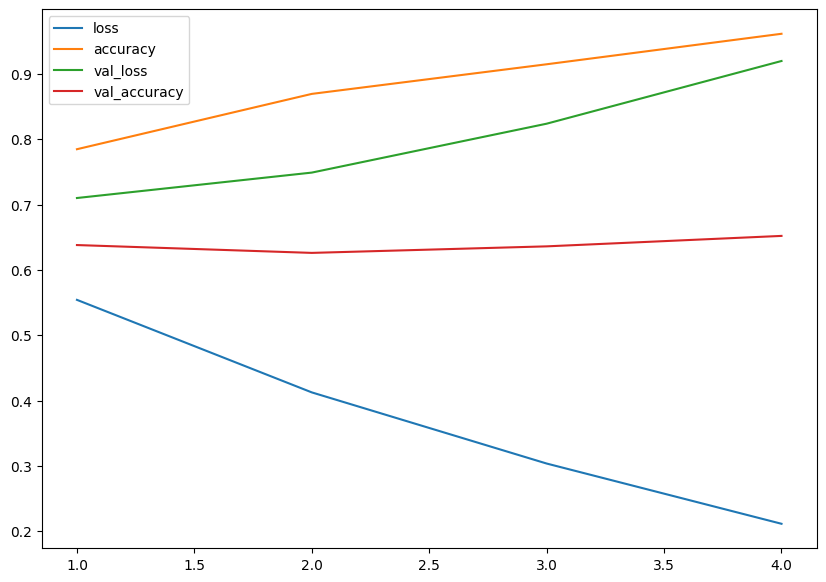

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history_3.history)[1:].plot(figsize=(10,7))

In [58]:
#using an argumented data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

argumented_data_gen = ImageDataGenerator(rescale = 1./255. ,
                                         rotation_range=0.2,
                                         width_shift_range=0.2,
                                         height_shift_range=0.2,
                                         #brightness_range=(0.2,0.4),
                                         shear_range=0.2,
                                         zoom_range=0.2,
                                         channel_shift_range=0.2,
                                         )

In [59]:
non_argumented_train_datagen = ImageDataGenerator(rescale=1./255. )

non_argumented_test_datagen = ImageDataGenerator(rescale=1./255.)

In [60]:

argumented_train_data = argumented_data_gen.flow_from_directory(directory=train_dir,
                                                                target_size=(224,224),
                                                                class_mode="binary",
                                                                batch_size=32,
                                                                shuffle=False,
                                                                seed=42)

non_argumented_train_data = non_argumented_train_datagen.flow_from_directory(directory=train_dir,
                                                                             target_size=(224,224),
                                                                             class_mode="binary",
                                                                             batch_size=32,
                                                                             shuffle=False,
                                                                             seed=42)

non_argumented_test_data = non_argumented_test_datagen.flow_from_directory(directory=valid_dir,
                                                                           target_size=(224,224),
                                                                           batch_size=32,
                                                                           class_mode="binary")

Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [61]:
import random

def random_plot_argumented_unargumented( argumented_data , un_argumented_data):
  a_data = argumented_data.next()[0]
  u_data = un_argumented_data.next()[0]

  random_int = random.randrange(0,len(a_data)-1)
  plt.figure(figsize=(10,7))
  plt.subplot(1,2,1)
  plt.imshow(a_data[random_int])
  plt.title("Argumented data")

  plt.subplot(1,2,2)
  plt.imshow(u_data[random_int])
  plt.title("Un Argumented data")



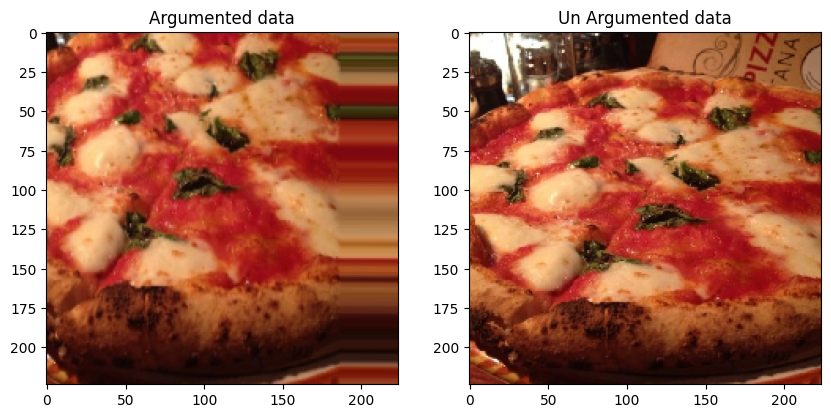

In [62]:
random_plot_argumented_unargumented(argumented_train_data,non_argumented_train_data)

32